In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import math
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import datetime
from pathlib import Path

/Users/aguetat/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aguetat/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aguetat/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aguetat/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [51]:
dataset = pd.read_csv('/Users/aguetat/Desktop/dataset.csv')
dataset.head(5)
#dataset = DataFrame.values
#dataset = dataset.astype('float32')

,X1,X2
0,1.11,0.00
1,1.94,0.83
2,2.81,0.87
3,3.47,0.66
4,4.44,0.97


In [52]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)


In [53]:
# fix random seed for reproducibility
np.random.seed(7)

In [54]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [55]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [56]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [57]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [58]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 2.9581e-04
Epoch 2/100
 - 0s - loss: 2.3144e-04
Epoch 3/100
 - 0s - loss: 1.7516e-04
Epoch 4/100
 - 0s - loss: 1.2705e-04
Epoch 5/100
 - 0s - loss: 8.7118e-05
Epoch 6/100
 - 0s - loss: 5.5259e-05
Epoch 7/100
 - 0s - loss: 3.1216e-05
Epoch 8/100
 - 0s - loss: 1.4540e-05
Epoch 9/100
 - 0s - loss: 4.5518e-06
Epoch 10/100
 - 0s - loss: 3.2856e-07
Epoch 11/100
 - 0s - loss: 7.0811e-07
Epoch 12/100
 - 0s - loss: 4.3464e-06
Epoch 13/100
 - 0s - loss: 9.8237e-06
Epoch 14/100
 - 0s - loss: 1.5794e-05
Epoch 15/100
 - 0s - loss: 2.1137e-05
Epoch 16/100
 - 0s - loss: 2.5072e-05
Epoch 17/100
 - 0s - loss: 2.7186e-05
Epoch 18/100
 - 0s - loss: 2.7402e-05
Epoch 19/100
 - 0s - loss: 2.5910e-05
Epoch 20/100
 - 0s - loss: 2.3071e-05
Epoch 21/100
 - 0s - loss: 1.9342e-05
Epoch 22/100
 - 0s - loss: 1.5200e-05
Epoch 23/100
 - 0s - loss: 1.1083e-05
Epoch 24/100
 - 0s - loss: 7.3581e-06
Epoch 25/100
 - 0s - loss: 4.2898e-06
Epoch 26/100
 - 0s - loss: 2.0331e-06
Epoch 27/100
 - 0s - 

In [59]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [60]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,2)

In [61]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

TypeError: Singleton array 0.017619829774525905 cannot be considered a valid collection.

In [62]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [63]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

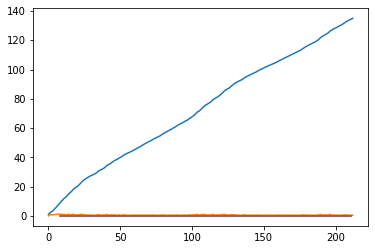

In [65]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()